In [11]:
import numpy as np
import pandas as pd

In [12]:
import scipy
import sklearn

Data Importing & Cleaning

In [13]:
data = pd.read_csv('VIX_data_new.csv')

In [14]:
data.head()

,Date,Unemployment Rate,CPI,Fed Rate,BBB Rate,VIX,GDP,JPY/USD Spot Rate,Spot Crude Oil Price,SP500 ^GSPC,...,DJI ^DJI,DJI ^DJI.1,RUSSELL2000 ^RUT,RUSSELL2000 ^RUT.1,FTSE ^FTSE,FTSE ^FTSE.1,NIKKEI ^N225,NIKKEI ^N225.1,GOLD GC=F,USD INDEX DX-Y.NYB
0,2004-12-01,5.4,191.7,2.16,5.04,12.550,12527.214,103.81,43.33,1211.920044,...,10783.009766,5744730000,651.570007,31102700000,4814.299805,28451048500,11488.759766,1437800000,12728,80.849998
1,2005-01-01,5.3,191.6,2.28,5.13,13.340,12767.286,103.34,46.84,1181.270020,...,10489.940430,5424930000,624.020020,31498000000,4852.299805,31489218700,11387.589844,1616200000,115342,83.599998
2,2005-02-01,5.4,192.4,2.50,5.11,11.600,12767.286,104.94,47.97,1203.599976,...,10766.230469,5038600000,634.059998,29297410000,4968.500000,33004713300,11740.599609,1665700000,8468,82.510002
3,2005-03-01,5.2,193.1,2.63,5.50,13.145,12767.286,105.25,54.31,1180.589966,...,10503.759766,5820160000,615.070007,39014150000,4894.399902,34739240300,11668.950195,2032200000,3171,84.059998
4,2005-04-01,5.2,193.7,2.79,5.65,14.530,12922.656,107.19,53.04,1156.849976,...,10192.509766,5852240000,579.380005,43424270000,4801.700195,32554037300,11008.900391,1675000000,2579,84.430000


In [15]:
data.shape

(206, 23)

In [16]:
total_check = data.isnull().sum() + (data== '').sum()
has_missing_data = total_check.sum() >0
print(has_missing_data)

False


In [17]:
data.index = pd.to_datetime(data['Date'])

In [18]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
column_means = data[numeric_columns].mean()

data_filled = data.copy()
data_filled[numeric_columns].fillna(column_means)

,Unemployment Rate,CPI,Fed Rate,BBB Rate,VIX,GDP,JPY/USD Spot Rate,Spot Crude Oil Price,SP500 ^GSPC,SP500 ^GSPC.1,...,DJI ^DJI,DJI ^DJI.1,RUSSELL2000 ^RUT,RUSSELL2000 ^RUT.1,FTSE ^FTSE,FTSE ^FTSE.1,NIKKEI ^N225,NIKKEI ^N225.1,GOLD GC=F,USD INDEX DX-Y.NYB
Date,,,,,,,,,,,,,,,,,,,,,
2004-12-01,5.4,191.700,2.16,5.04,12.550,12527.214,103.81,43.33,1211.920044,31102500000,...,10783.009766,5744730000,651.570007,31102700000,4814.299805,28451048500,11488.759766,1437800000,12728,80.849998
2005-01-01,5.3,191.600,2.28,5.13,13.340,12767.286,103.34,46.84,1181.270020,31498800000,...,10489.940430,5424930000,624.020020,31498000000,4852.299805,31489218700,11387.589844,1616200000,115342,83.599998
2005-02-01,5.4,192.400,2.50,5.11,11.600,12767.286,104.94,47.97,1203.599976,29297410000,...,10766.230469,5038600000,634.059998,29297410000,4968.500000,33004713300,11740.599609,1665700000,8468,82.510002
2005-03-01,5.2,193.100,2.63,5.50,13.145,12767.286,105.25,54.31,1180.589966,39014150000,...,10503.759766,5820160000,615.070007,39014150000,4894.399902,34739240300,11668.950195,2032200000,3171,84.059998
2005-04-01,5.2,193.700,2.79,5.65,14.530,12922.656,107.19,53.04,1156.849976,43424270000,...,10192.509766,5852240000,579.380005,43424270000,4801.700195,32554037300,11008.900391,1675000000,2579,84.430000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-01,4.1,313.049,5.33,5.63,12.645,29016.714,157.86,79.77,5460.479980,76025620000,...,39118.859375,7213580000,2047.689941,76025620000,8164.100098,18910547600,39583.078125,2209000000,7958,105.870003
2024-07-01,4.3,313.534,5.33,5.53,13.190,29374.914,157.52,81.80,5522.299805,80160390000,...,40842.789062,7507140000,2254.479980,80160390000,8368.000000,16067728100,39101.820312,2570500000,155434,104.099998
2024-08-01,4.2,314.121,5.33,5.20,16.690,29374.914,146.26,76.68,5648.399902,81097300000,...,41563.078125,8368220000,2217.629883,81097300000,8376.599609,18173603500,38647.750000,3034000000,12103,101.699997


In [19]:
VIX_data = data_filled['VIX']

In [20]:
if isinstance(VIX_data, pd.Series):
    VIX = VIX_data.to_frame(name='VIX')

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf

In [23]:
#Log Transformation
log_VIX = np.log1p(VIX)

In [24]:
#Differencing
diff_VIX = VIX.diff() #First order differencing
diff_VIX.iloc[0] = 0


diff_log_VIX = log_VIX.diff() 
diff_log_VIX.iloc[0] = 0

In [25]:
# Seasonal Differencing for Monthly Data (12-month seasonality)
seasonal_diff_VIX = VIX.diff(periods=12)
seasonal_diff_log_VIX = log_VIX.diff(periods=12)

In [26]:
#Rolling statistics

def calculate_rolling_stats(df, window):
    rolling_mean = df.rolling(window=window).mean()
    rolling_std = df.rolling(window=window).std()
    return rolling_mean, rolling_std

window_size = 12

rolling_mean, rolling_std = calculate_rolling_stats(VIX, window=window_size)
rolling_mean_log_data, rolling_std_log_data = calculate_rolling_stats(log_VIX, window=window_size)
rolling_mean_diff_data, rolling_std_diff_data = calculate_rolling_stats(diff_VIX, window=window_size)
rolling_mean_diff_log_data, rolling_std_diff_log_data = calculate_rolling_stats(diff_log_VIX, window=window_size)
rolling_mean_seasonal_diff, rolling_std_seasonal_diff = calculate_rolling_stats(seasonal_diff_VIX, window=window_size)
rolling_mean_seasonal_diff_log_data, rolling_std_seasonal_diff_log_data = calculate_rolling_stats(seasonal_diff_log_VIX, window=window_size)

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
#Decompose

def decompose_and_plot(series, period):
    decomposition = seasonal_decompose(series, model='additive', period=period)

    fig = plt.figure(figsize=(15, 10))
    gs = fig.add_gridspec(2, 3)
    
    fig.suptitle('VIX', fontsize=20)
    

    #Plot original data
    ax_original = fig.add_subplot(gs[0, :])
    ax_original.plot(series)
    ax_original.set_title('Original')
    ax_original.set_xlabel('')

    #Plot trend
    ax_trend = fig.add_subplot(gs[1, 0])
    ax_trend.plot(decomposition.trend)
    ax_trend.set_title('Trend')

    #Plot seasonal
    ax_seasonal = fig.add_subplot(gs[1, 1])
    ax_seasonal.plot(decomposition.seasonal)
    ax_seasonal.set_title('Seasonal')

    #Plot residual
    ax_residual = fig.add_subplot(gs[1, 2])
    ax_residual.plot(decomposition.resid)
    ax_residual.set_title('Residual')

    plt.tight_layout()
    plt.show()

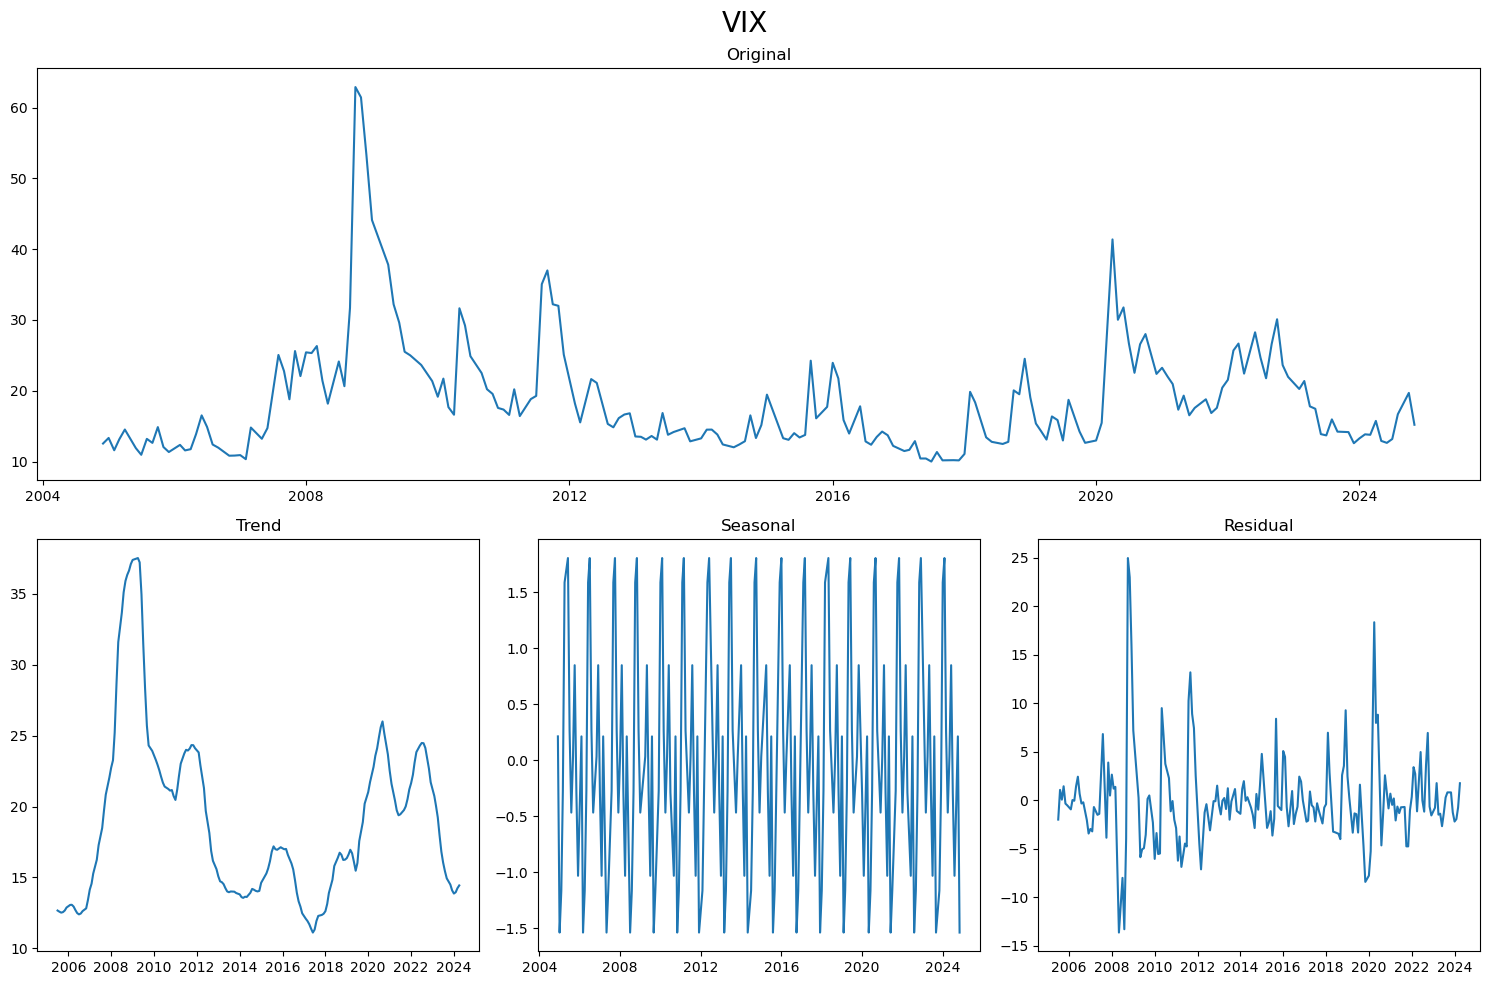

In [29]:
period = 12

decompose_and_plot(VIX, period)

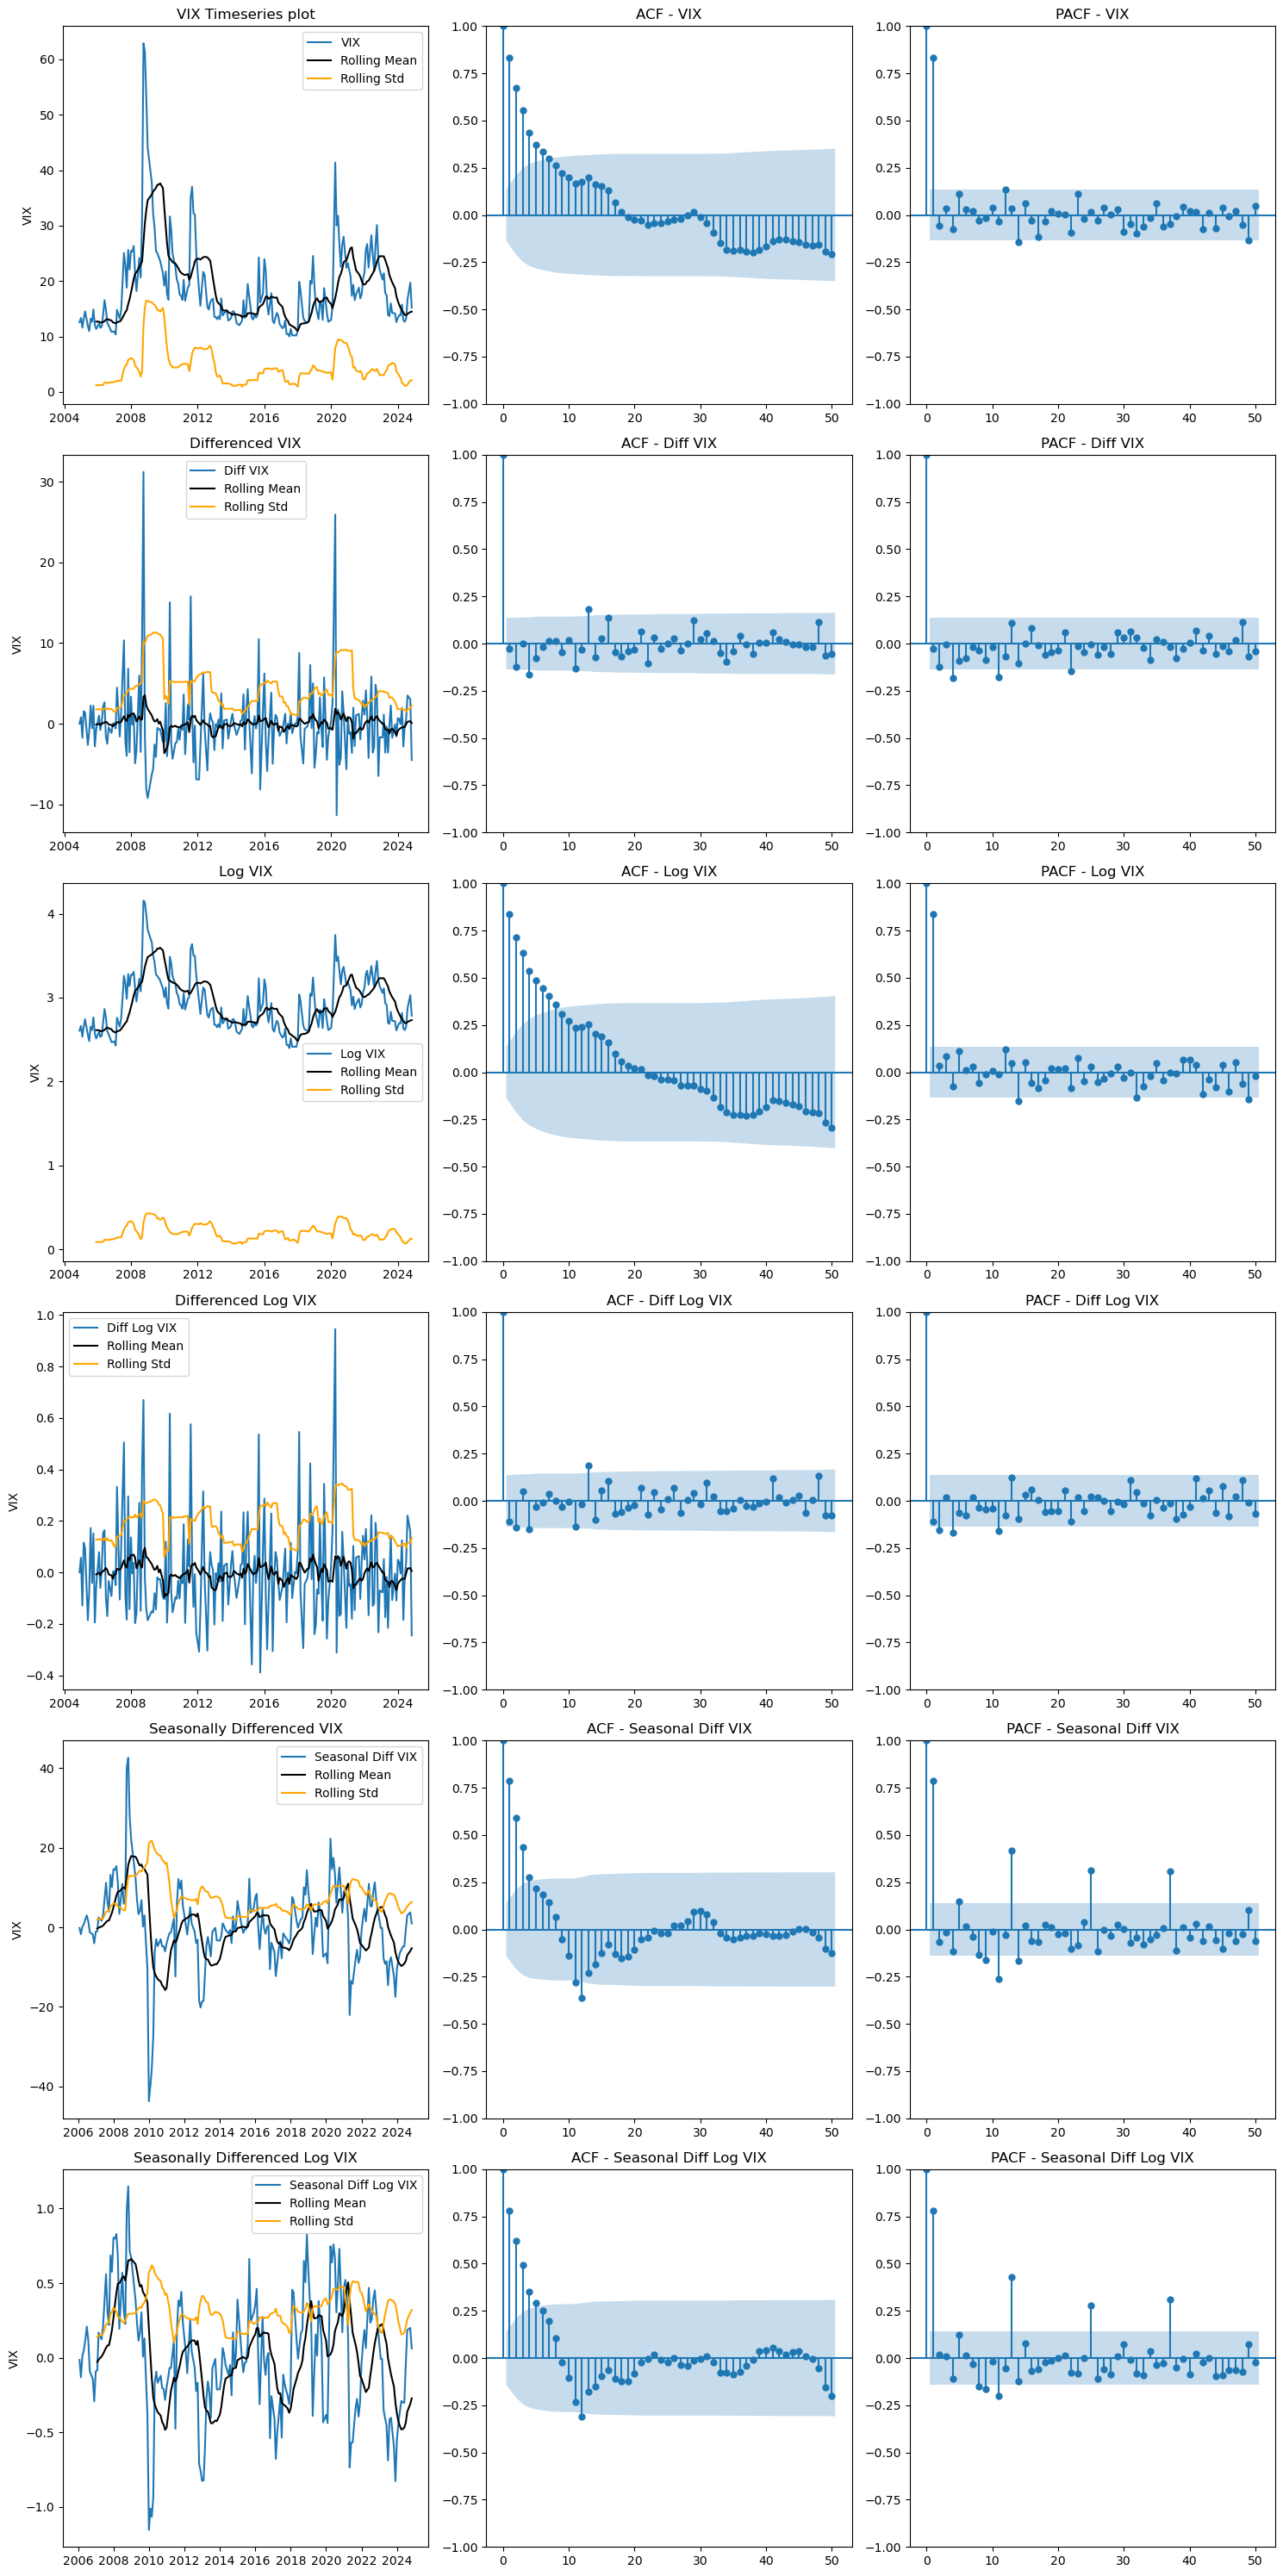

In [30]:
#VIX plots

n_cols = 3
n_rows = 6

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))


#VIX Data
sns.lineplot(data=VIX, x=VIX.index, y=VIX['VIX'], label='VIX', ax=axes[0,0])
sns.lineplot(data=rolling_mean, x=rolling_mean.index, y=rolling_mean['VIX'], color='black', label='Rolling Mean', ax=axes[0,0])
sns.lineplot(data=rolling_std, x=rolling_std.index, y=rolling_std['VIX'], color='orange', label='Rolling Std', ax=axes[0,0])
axes[0,0].legend(loc='best')
axes[0,0].set_title("VIX Timeseries plot")
axes[0,0].set_xlabel('')

# sns.histplot(data=VIX, x=VIX['VIX'], kde=True, bins='auto', ax=axes[0,1])
# axes[0,1].set_title("Histogram of VIX")

sm.graphics.tsa.plot_acf(VIX['VIX'], lags=50, ax=axes[0,1])
axes[0,1].set_title('ACF - VIX')

sm.graphics.tsa.plot_pacf(VIX['VIX'], lags=50, ax=axes[0,2])
axes[0,2].set_title('PACF - VIX')

#Differencing 1 
sns.lineplot(data=diff_VIX, x=diff_VIX.index, y=diff_VIX['VIX'], label='Diff VIX', ax=axes[1,0])
sns.lineplot(data=rolling_mean_diff_data, x=rolling_mean_diff_data.index, y=rolling_mean_diff_data['VIX'], color='black', label='Rolling Mean', ax=axes[1,0])
sns.lineplot(data=rolling_std_diff_data, x=rolling_std_diff_data.index, y=rolling_std_diff_data['VIX'], color='orange', label='Rolling Std', ax=axes[1,0])
axes[1,0].legend(loc='best')
axes[1,0].set_title("Differenced VIX")
axes[1,0].set_xlabel('')

sm.graphics.tsa.plot_acf(diff_VIX['VIX'], lags=50, ax=axes[1,1])
axes[1,1].set_title('ACF - Diff VIX')

sm.graphics.tsa.plot_pacf(diff_VIX['VIX'], lags=50, ax=axes[1,2])
axes[1,2].set_title('PACF - Diff VIX')

#Log of VIX
sns.lineplot(data=log_VIX, x=VIX.index, y=log_VIX['VIX'], label='Log VIX', ax=axes[2,0])
sns.lineplot(data=rolling_mean_log_data, x=rolling_mean_log_data.index, y=rolling_mean_log_data['VIX'], color='black', label='Rolling Mean', ax=axes[2,0])
sns.lineplot(data=rolling_std_log_data, x=rolling_std_log_data.index, y=rolling_std_log_data['VIX'], color='orange', label='Rolling Std', ax=axes[2,0])
axes[2,0].legend(loc='best')
axes[2,0].set_title("Log VIX")
axes[2,0].set_xlabel('')

sm.graphics.tsa.plot_acf(log_VIX['VIX'], lags=50, ax=axes[2,1])
axes[2,1].set_title('ACF - Log VIX')

sm.graphics.tsa.plot_pacf(log_VIX['VIX'], lags=50, ax=axes[2,2])
axes[2,2].set_title('PACF - Log VIX')

#Difference of Log VIX
sns.lineplot(data=diff_log_VIX, x=diff_log_VIX.index, y=diff_log_VIX['VIX'], label='Diff Log VIX', ax=axes[3,0])
sns.lineplot(data=rolling_mean_diff_log_data, x=rolling_mean_diff_log_data.index, y=rolling_mean_diff_log_data['VIX'], color='black', label='Rolling Mean', ax=axes[3,0])
sns.lineplot(data=rolling_std_diff_log_data, x=rolling_std_diff_log_data.index, y=rolling_std_diff_log_data['VIX'], color='orange', label='Rolling Std', ax=axes[3,0])
axes[3,0].legend(loc='best')
axes[3,0].set_title("Differenced Log VIX")
axes[3,0].set_xlabel('')

sm.graphics.tsa.plot_acf(diff_log_VIX['VIX'], lags=50, ax=axes[3,1])
axes[3,1].set_title('ACF - Diff Log VIX')

sm.graphics.tsa.plot_pacf(diff_log_VIX['VIX'], lags=50, ax=axes[3,2])
axes[3,2].set_title('PACF - Diff Log VIX')


#Seasonal differencing 
sns.lineplot(data=seasonal_diff_VIX, x=seasonal_diff_VIX.index, y=seasonal_diff_VIX['VIX'], label='Seasonal Diff VIX', ax=axes[4,0])
sns.lineplot(data=rolling_mean_seasonal_diff, x=rolling_mean_seasonal_diff.index, y=rolling_mean_seasonal_diff['VIX'], color='black', label='Rolling Mean', ax=axes[4,0])
sns.lineplot(data=rolling_std_seasonal_diff, x=rolling_std_seasonal_diff.index, y=rolling_std_seasonal_diff['VIX'], color='orange', label='Rolling Std', ax=axes[4,0])
axes[4,0].legend(loc='best')
axes[4,0].set_title("Seasonally Differenced VIX")
axes[4,0].set_xlabel('')

sm.graphics.tsa.plot_acf(seasonal_diff_VIX['VIX'].dropna(), lags=50, ax=axes[4,1])
axes[4,1].set_title('ACF - Seasonal Diff VIX')

sm.graphics.tsa.plot_pacf(seasonal_diff_VIX['VIX'].dropna(), lags=50, ax=axes[4,2])
axes[4,2].set_title('PACF - Seasonal Diff VIX')

#Seasonal differencing Log VIX
sns.lineplot(data=seasonal_diff_log_VIX, x=seasonal_diff_log_VIX.index, y=seasonal_diff_log_VIX['VIX'], label='Seasonal Diff Log VIX', ax=axes[5,0])
sns.lineplot(data=rolling_mean_seasonal_diff_log_data, x=rolling_mean_seasonal_diff_log_data.index, y=rolling_mean_seasonal_diff_log_data['VIX'], color='black', label='Rolling Mean', ax=axes[5,0])
sns.lineplot(data=rolling_std_seasonal_diff_log_data, x=rolling_std_seasonal_diff_log_data.index, y=rolling_std_seasonal_diff_log_data['VIX'], color='orange', label='Rolling Std', ax=axes[5,0])
axes[5,0].legend(loc='best')
axes[5,0].set_title("Seasonally Differenced Log VIX")
axes[5,0].set_xlabel('')

sm.graphics.tsa.plot_acf(seasonal_diff_log_VIX['VIX'].dropna(), lags=50, ax=axes[5,1])
axes[5,1].set_title('ACF - Seasonal Diff Log VIX')

sm.graphics.tsa.plot_pacf(seasonal_diff_log_VIX['VIX'].dropna(), lags=50, ax=axes[5,2])
axes[5,2].set_title('PACF - Seasonal Diff Log VIX')

plt.tight_layout()
plt.show()

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox

In [32]:
import warnings

In [33]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Define the range of p, d, q, P, D, Q values to test
p_values = range(1, 3)
d_values = range(1, 2)
q_values = range(1, 3)
P_values = range(1, 2)
D_values = range(1, 2)
Q_values = range(1, 2)
m_values = [12]  #Monthly seasonality

# Initialize list to store results
results = []

# Iterate through different combinations of parameters
for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        for m in m_values:
                            try:
                                # Fit SARIMA model
                                model = SARIMAX(VIX, order=(p, d, q), seasonal_order=(P, D, Q, m))
                                results_sarima = model.fit(disp=False)
                                
                                # Calculate AIC
                                aic = results_sarima.aic
                                
                                # Calculate SSE
                                sse = np.sum(results_sarima.resid**2)
                                
                                # Perform Ljung-Box test
                                lb_test = acorr_ljungbox(results_sarima.resid, lags=[10], return_df=True)
                                lb_pvalue = lb_test['lb_pvalue'].values[0]
                                
                                # Store results
                                results.append({
                                    'p': p, 'd': d, 'q': q,
                                    'P': P, 'D': D, 'Q': Q, 'm': m,
                                    'AIC': aic,
                                    'SSE': sse,
                                    'LjungBox_pval': lb_pvalue
                                })
                            except:
                                # If the model fails to converge, skip this combination
                                continue

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Filter results for significant p-values (e.g., p-value < 0.05) and low AIC
significant_results = results_df[(results_df['LjungBox_pval'] > 0.05) & (results_df['AIC'].notnull())]

# Sort by AIC to find the best model
best_model = significant_results.sort_values(by='AIC').iloc[0] if not significant_results.empty else None

print("All results:")
print(results_df)
print("\nBest model:")
print(best_model)


All results:
   p  d  q  P  D  Q   m          AIC          SSE  LjungBox_pval
0  1  1  1  1  1  1  12  1176.163793  4975.315490       0.612798
1  1  1  2  1  1  1  12  1177.151595  4933.443898       0.769408
2  2  1  1  1  1  1  12  1184.494892  5110.503022       0.420163
3  2  1  2  1  1  1  12  1177.985202  4906.266756       0.898145

Best model:
p                   1.000000
d                   1.000000
q                   1.000000
P                   1.000000
D                   1.000000
Q                   1.000000
m                  12.000000
AIC              1176.163793
SSE              4975.315490
LjungBox_pval       0.612798
Name: 0, dtype: float64


In [34]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats

In [35]:
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_percentage_error

In [36]:
def mean_directional_accuracy(actual, predicted):
    actual = np.asarray(actual).flatten()
    predicted = np.asarray(predicted).flatten()

    if len(actual) != len(predicted):
        raise ValueError("Input arrays must have the same length")

    if len(actual) < 2:
        raise ValueError("Input arrays must have at least two elements")

    actual_diff = np.diff(actual)
    predicted_diff = np.diff(predicted)

    # Handle cases where there are no changes in actual values
    valid_indices = actual_diff != 0
    if np.sum(valid_indices) == 0:
        return np.nan  # or another appropriate value

    num_correct = np.sum((np.sign(actual_diff[valid_indices]) == np.sign(predicted_diff[valid_indices])))
    mda = num_correct / np.sum(valid_indices)

    return mda

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87621D+00    |proj g|=  9.39008D-02


 This problem is unconstrained.



At iterate    5    f=  2.76973D+00    |proj g|=  5.29265D-02

At iterate   10    f=  2.76263D+00    |proj g|=  6.04945D-03

At iterate   15    f=  2.76072D+00    |proj g|=  7.90632D-03

At iterate   20    f=  2.76038D+00    |proj g|=  7.26827D-04

At iterate   25    f=  2.76021D+00    |proj g|=  5.71687D-04

At iterate   30    f=  2.76020D+00    |proj g|=  3.63936D-04

At iterate   35    f=  2.76020D+00    |proj g|=  1.80472D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     36     39      1     0     0   9.035D-06   2.760D+00
  F =   2.7601962031230074     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

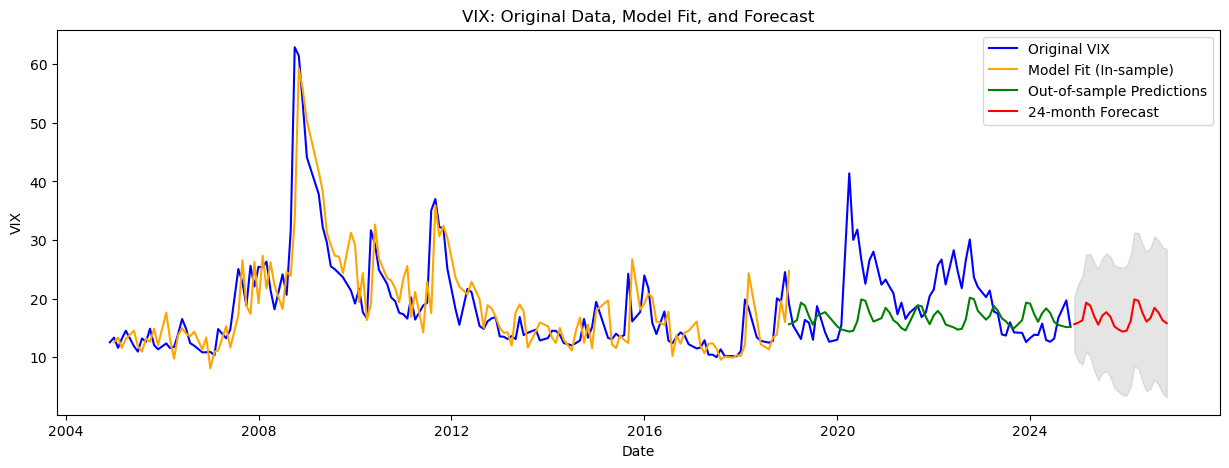

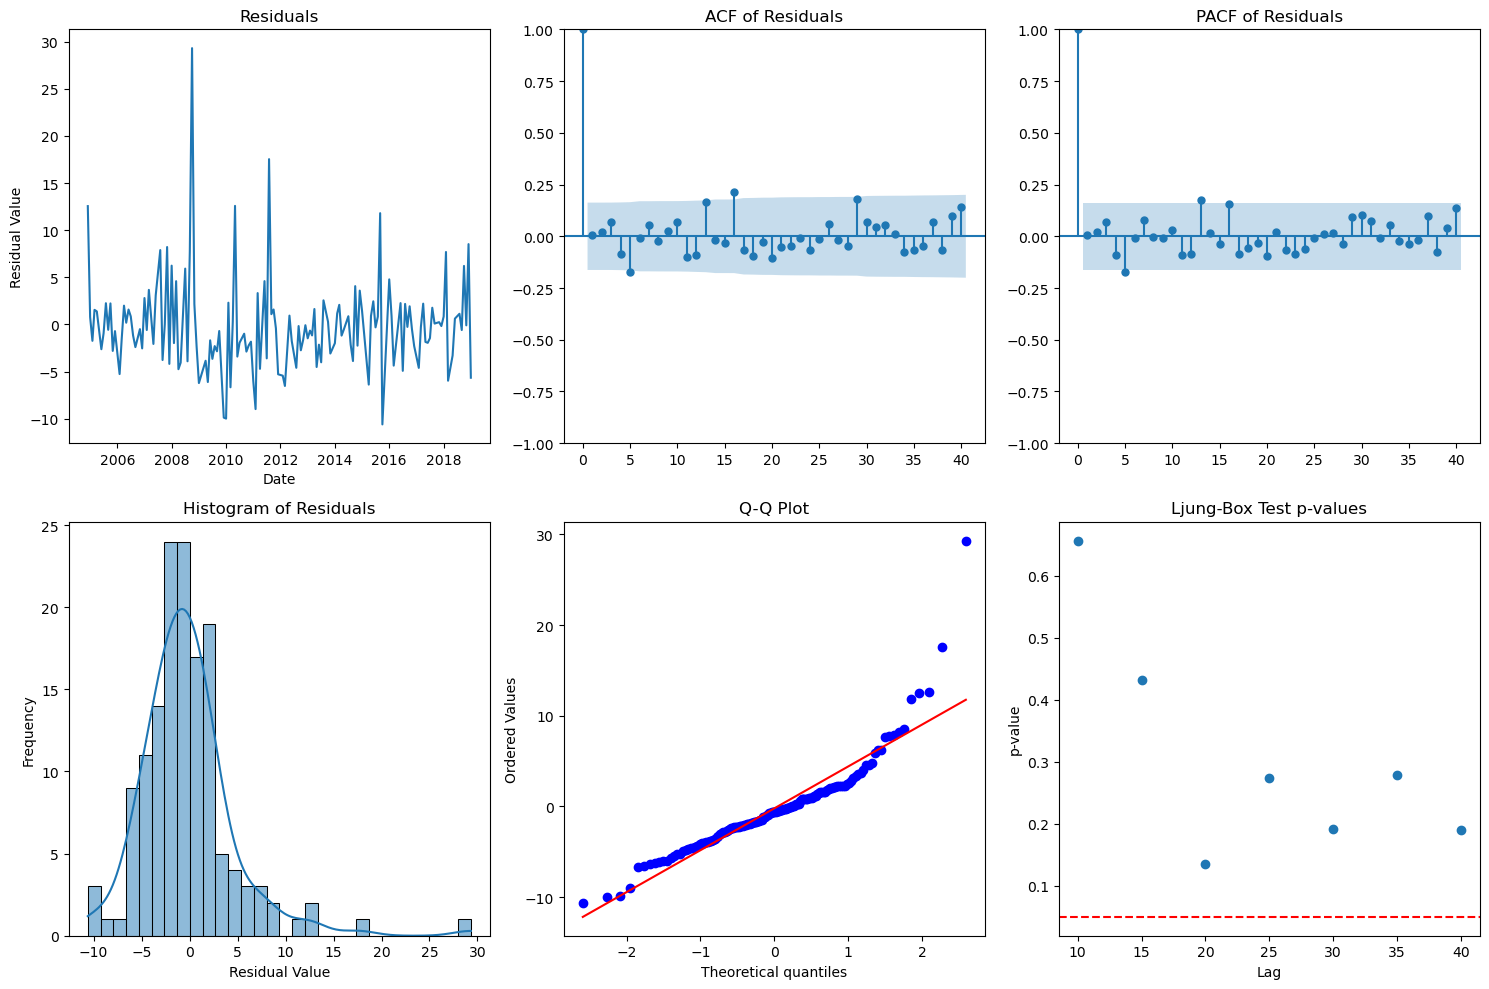

Ljung-Box Test Results:
      lb_stat  lb_pvalue
10   7.718766   0.656286
15  15.279544   0.431475
20  27.004516   0.135137
25  28.757317   0.274188
30  36.542140   0.190861
35  39.401761   0.279431
40  47.614835   0.190473

In-sample R-squared: 0.6844
In-sample RMSE: 4.9318
In-sample MAPE: 0.1782
In-sample Directional Accuracy: 0.4583

Out-of-sample R-squared: -0.2934
Out-of-sample RMSE: 6.6675
Out-of-sample MAPE: 0.2269
Out-of-sample Directional Accuracy: 0.5082

SARIMA R-squared: 0.5304
SARIMA RMSE: 5.5175
SARIMA MAPE: 0.1929
SARIMA Directional Accuracy: 0.4780


In [37]:
# Split data into in-sample and out-of-sample datasets
split_date = "2019-01-01"
in_sample = VIX[:split_date]
out_of_sample = VIX[split_date:]

# Fit SARIMAX model on the in-sample data only
model = SARIMAX(in_sample, order=(2, 1, 2), seasonal_order=(2, 1, 2, 12))
sarima_results = model.fit()

# Generate in-sample predictions
sarima_in_sample_predictions = sarima_results.get_prediction(start=in_sample.index[0], end=in_sample.index[-1]).predicted_mean

# Generate out-of-sample predictions
sarima_out_of_sample_predictions = sarima_results.get_forecast(steps=len(out_of_sample)).predicted_mean
sarima_out_of_sample_predictions.index = out_of_sample.index  # Align indices

# Generate forecasted values and confidence intervals for 6 months
forecast_steps = 24
sarima_forecast = sarima_results.get_forecast(steps=forecast_steps)
sarima_forecasted_values = sarima_forecast.predicted_mean

sarima_conf_int = sarima_forecast.conf_int(alpha=0.32)

# Define forecast dates explicitly
last_date = VIX.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.offsets.MonthEnd(1), periods=forecast_steps, freq="M")

# Plot original VIX, model fit, and forecast
plt.figure(figsize=(15, 5))
plt.plot(VIX, label='Original VIX', color='blue')
plt.plot(sarima_in_sample_predictions.iloc[1:], label='Model Fit (In-sample)', color='orange')
plt.plot(sarima_out_of_sample_predictions, label='Out-of-sample Predictions', color='green')
plt.plot(forecast_dates, sarima_forecasted_values, label='24-month Forecast', color='red')
plt.fill_between(forecast_dates,
                 sarima_conf_int.iloc[:, 0],
                 sarima_conf_int.iloc[:, 1],
                 color='gray', alpha=0.2)
plt.title('VIX: Original Data, Model Fit, and Forecast')
plt.xlabel('Date')
plt.ylabel('VIX')
plt.legend()
plt.show()

# Calculate residuals
sarima_residuals = sarima_results.resid

# Create a 2x3 subplot for residual analysis
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
# fig.suptitle('SARIMA - Residual Analysis', fontsize=16)

# Plot residuals
axes[0, 0].plot(sarima_residuals)
axes[0, 0].set_title('Residuals')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Residual Value')

# ACF of residuals
plot_acf(sarima_residuals, ax=axes[0, 1], lags=40)
axes[0, 1].set_title('ACF of Residuals')

# PACF of residuals
plot_pacf(sarima_residuals, ax=axes[0, 2], lags=40)
axes[0, 2].set_title('PACF of Residuals')

# Histogram of residuals
sns.histplot(sarima_residuals, kde=True, ax=axes[1,0], bins=30, edgecolor='black')
axes[1, 0].set_title('Histogram of Residuals')
axes[1, 0].set_xlabel('Residual Value')
axes[1, 0].set_ylabel('Frequency')

# Q-Q plot
qq = stats.probplot(sarima_residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot')

# Ljung-Box test
lb_results = acorr_ljungbox(sarima_residuals, lags=[10, 15, 20, 25, 30, 35, 40])
axes[1, 2].scatter(lb_results.index, lb_results['lb_pvalue'])
axes[1, 2].axhline(y=0.05, color='r', linestyle='--')
axes[1, 2].set_title('Ljung-Box Test p-values')
axes[1, 2].set_xlabel('Lag')
axes[1, 2].set_ylabel('p-value')

plt.tight_layout()
plt.show()

# Print Ljung-Box test results
print("Ljung-Box Test Results:")
print(lb_results)

# Calculate metrics
sarima_in_sample_r2 = r2_score(in_sample, sarima_in_sample_predictions)
sarima_in_sample_rmse = root_mean_squared_error(in_sample, sarima_in_sample_predictions)
sarima_in_sample_mape = mean_absolute_percentage_error(in_sample, sarima_in_sample_predictions)
sarima_in_sample_da = mean_directional_accuracy(in_sample, sarima_in_sample_predictions)

sarima_out_sample_r2 = r2_score(out_of_sample, sarima_out_of_sample_predictions)
sarima_out_sample_rmse = root_mean_squared_error(out_of_sample, sarima_out_of_sample_predictions)
sarima_out_sample_mape = mean_absolute_percentage_error(out_of_sample, sarima_out_of_sample_predictions)
sarima_out_sample_da = mean_directional_accuracy(out_of_sample, sarima_out_of_sample_predictions)

sarima_combined_predictions = pd.concat([sarima_in_sample_predictions, sarima_out_of_sample_predictions])
sarima_combined_predictions = sarima_combined_predictions[~sarima_combined_predictions.index.duplicated(keep='first')]

sarima_r2 = r2_score(VIX, sarima_combined_predictions)
sarima_rmse = root_mean_squared_error(VIX, sarima_combined_predictions)
sarima_mape = mean_absolute_percentage_error(VIX, sarima_combined_predictions)
sarima_da = mean_directional_accuracy(VIX, sarima_combined_predictions)


# Print results
print(f"\nIn-sample R-squared: {sarima_in_sample_r2:.4f}")
print(f"In-sample RMSE: {sarima_in_sample_rmse:.4f}")
print(f"In-sample MAPE: {sarima_in_sample_mape:.4f}")
print(f"In-sample Directional Accuracy: {sarima_in_sample_da:.4f}")
print(f"\nOut-of-sample R-squared: {sarima_out_sample_r2:.4f}")
print(f"Out-of-sample RMSE: {sarima_out_sample_rmse:.4f}")
print(f"Out-of-sample MAPE: {sarima_out_sample_mape:.4f}")
print(f"Out-of-sample Directional Accuracy: {sarima_out_sample_da:.4f}")
print(f"\nSARIMA R-squared: {sarima_r2:.4f}")
print(f"SARIMA RMSE: {sarima_rmse:.4f}")
print(f"SARIMA MAPE: {sarima_mape:.4f}")
print(f"SARIMA Directional Accuracy: {sarima_da:.4f}")



In [38]:
data_interim = data_filled.reset_index(drop=True)
data_interim.set_index('Date', inplace=True)

data_interim.index = pd.to_datetime(data_interim.index)

exog = data_interim[[ 'Unemployment Rate','CPI','Fed Rate','BBB Rate','GDP','SP500 ^GSPC.1']]

In [39]:
# Rename specific columns using a dictionary
exog.rename(columns={'SP500 ^GSPC.1': 'S&P Volume'}, inplace=True)


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
#Scaling the data for the model
scaler = StandardScaler()

scaled_exog = pd.DataFrame(scaler.fit_transform(exog), columns=exog.columns)
scaled_VIX = pd.DataFrame(scaler.fit_transform(VIX), columns=VIX.columns)

In [42]:
import dcor
from scipy.optimize import curve_fit
from statsmodels.nonparametric.smoothers_lowess import lowess

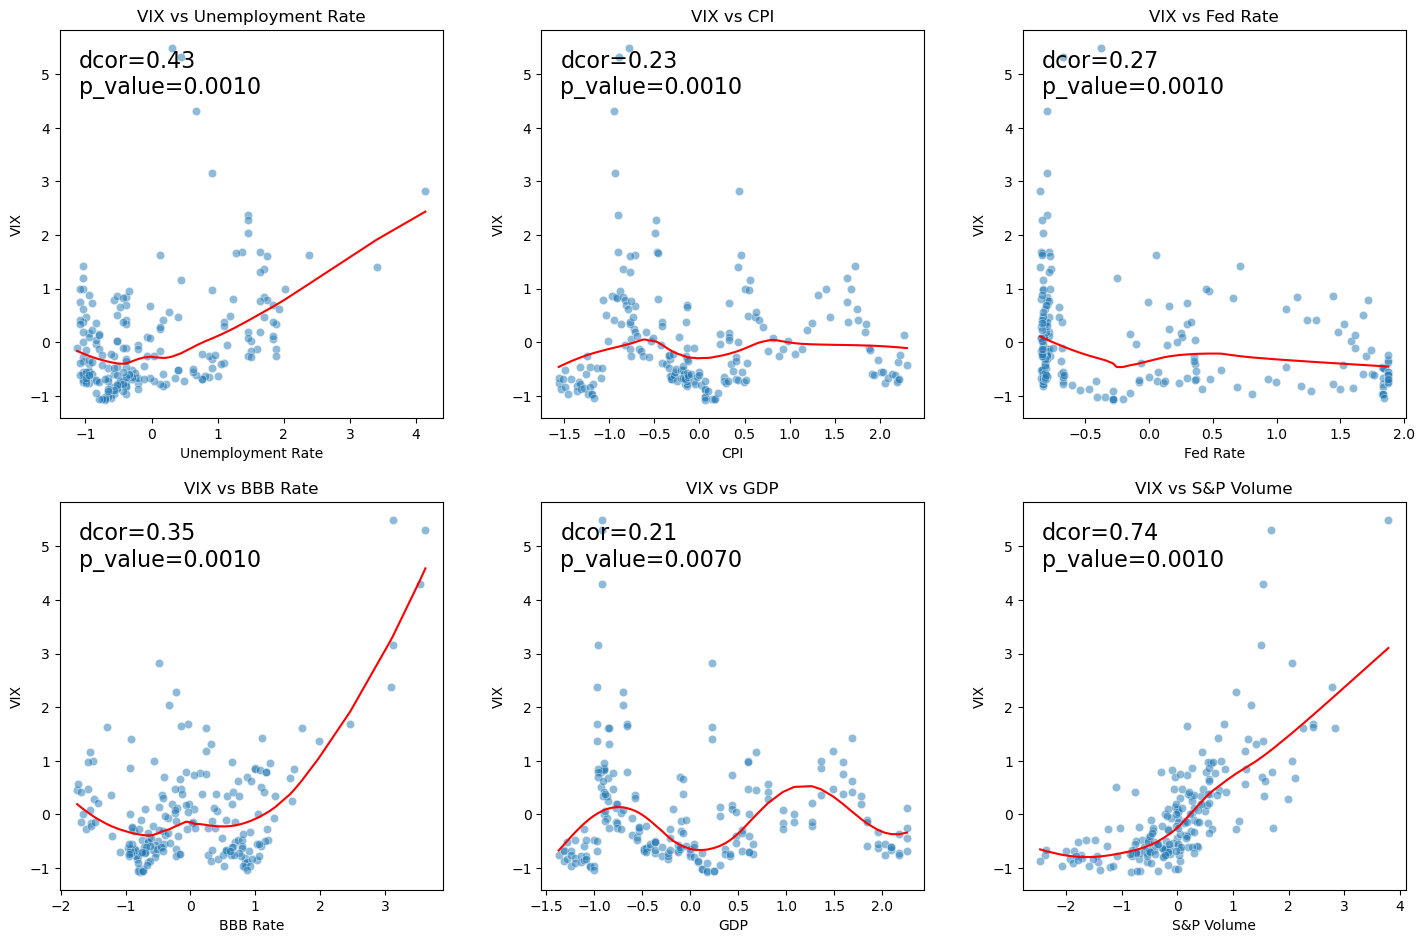

In [43]:
def fourier_func(x, a0, a1, b1, w):
    return a0 + a1 * np.cos(w * x) + b1 * np.sin(w * x)

def fourier_lowess_fit(x, y, lowess_frac=0.7):
    # Sort x and y based on x values
    sort_idx = np.argsort(x)
    x_sorted = x[sort_idx]
    y_sorted = y[sort_idx]
    
    # Fourier fit
    try:
        initial_guess = [np.mean(y), 1, 0, 0.1]
        params, _ = curve_fit(fourier_func, x_sorted, y_sorted, 
                            p0=initial_guess, 
                            maxfev=5000000, 
                            method='trf',
                            bounds=([-np.inf, -np.inf, -np.inf, 0], 
                                   [np.inf, np.inf, np.inf, np.inf]))
        y_fourier = fourier_func(x_sorted, *params)
        
        # LOWESS smoothing on Fourier residuals
        residuals = y_sorted - y_fourier
        smoothed_residuals = lowess(residuals, x_sorted, frac=lowess_frac, it=1)[:, 1]
        
        # Combine Fourier and smoothed residuals
        y_combined = y_fourier + smoothed_residuals
        
        return x_sorted, y_combined
    except:
        # Fallback to pure LOWESS if Fourier fitting fails
        return x_sorted, lowess(y_sorted, x_sorted, frac=lowess_frac, it=1)[:, 1]

feature_columns = scaled_exog.columns

n_cols = 3
n_rows = (len(feature_columns) + 2) // 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.tight_layout(pad=4.0)

dcor_results = {}

for i, feature in enumerate(feature_columns):
    row = i // n_cols
    col = i % n_cols
    
    ax = axes[row, col] if n_rows > 1 else axes[col]
    
    sns.scatterplot(x=scaled_exog[feature].squeeze(), 
                   y=scaled_VIX.squeeze(), 
                   ax=ax, 
                   alpha=0.5)

    dc = dcor.distance_correlation(scaled_exog[feature].squeeze(), 
                                 scaled_VIX.squeeze())
    p_value = dcor.independence.distance_covariance_test(
        scaled_exog[feature].squeeze(), 
        scaled_VIX.squeeze(), 
        exponent=1.0,
        num_resamples=1000
    )

    dcor_results[feature] = {'dcor': dc, 'p_value': p_value}

    x_data = scaled_exog[feature].values
    y_data = scaled_VIX['VIX'].values

    try:
        x_sorted, y_fit = fourier_lowess_fit(x_data, y_data)
        ax.plot(x_sorted, y_fit, color='red', label='Fourier-LOWESS')
    except Exception as e:
        print(f'Could not perform fit for {feature}: {e}')

    ax.text(0.05, 0.95, 
            f'dcor={dc:.2f}\np_value={p_value.pvalue:.4f}',
            transform=ax.transAxes,
            fontsize=16, 
            verticalalignment='top')
    
    ax.set_title(f'VIX vs {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('VIX')
    # ax.legend()

# Remove unused subplots
for i in range(len(feature_columns), n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    fig.delaxes(axes[row, col])

plt.show()

dcor_df = pd.DataFrame.from_dict(dcor_results, orient='index')


In [44]:
log_exog = np.log1p(exog)

diff_log_exog = log_exog.diff() 
diff_log_exog.iloc[0] = 0

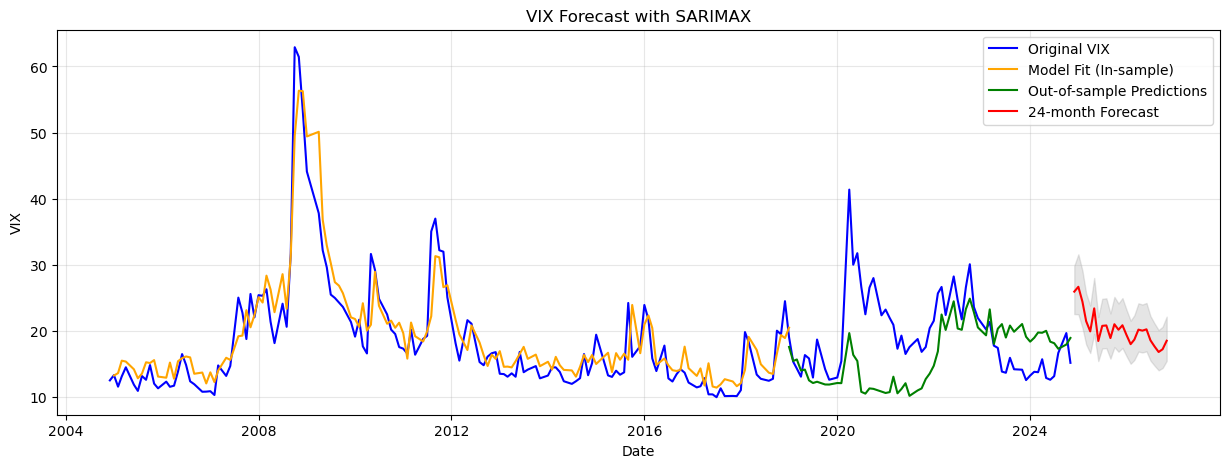

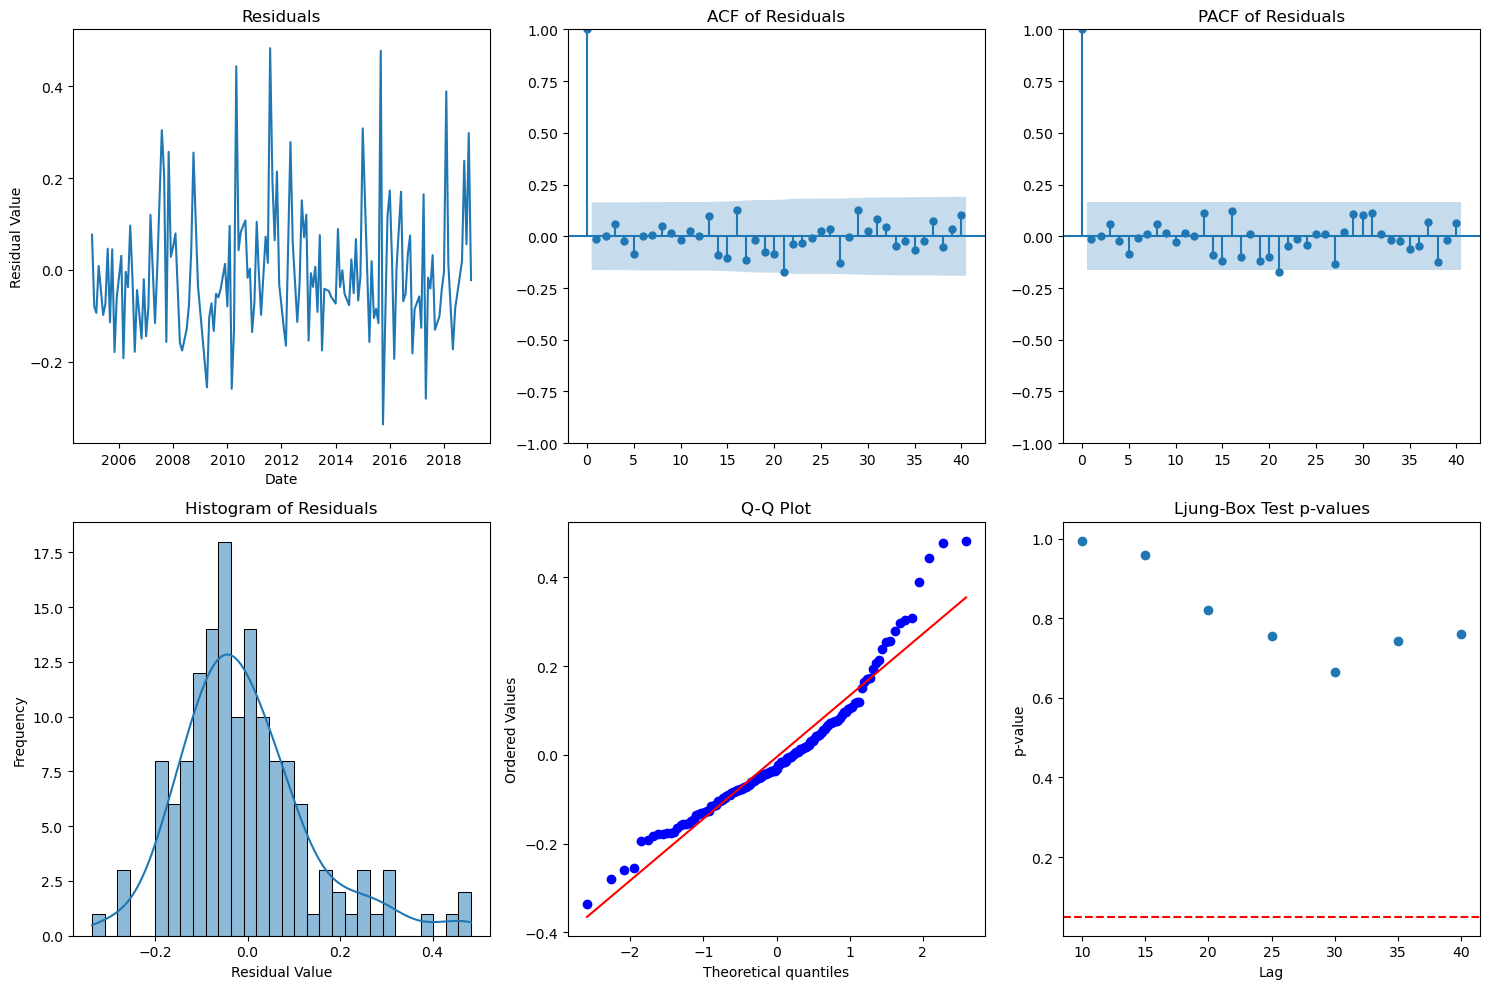

Ljung-Box Test Results:
      lb_stat  lb_pvalue
10   2.194569   0.994620
15   6.988772   0.957961
20  14.184988   0.820994
25  19.835935   0.755378
30  26.205008   0.664627
35  29.233090   0.742256
40  33.423477   0.759361

In-sample R-squared: 0.8554
In-sample RMSE: 1.8288
In-sample MAPE: 0.1043
In-sample Directional Accuracy: 0.6154

Out-of-sample R-squared: -0.8108
Out-of-sample RMSE: 2.8088
Out-of-sample MAPE: 0.2867
Out-of-sample Directional Accuracy: 0.6721

SARIMAX R-squared: 0.6139
SARIMAX RMSE: 5.0083
SARIMAX MAPE: 0.1858
SARIMAX Directional Accuracy: 0.6324


In [45]:
# Split the data
split_date = "2019-01-01"
in_sample = log_VIX[:split_date]
out_of_sample = log_VIX[split_date:]

# Split exogenous variables
exog_in_sample = log_exog[:split_date]
exog_out_of_sample = log_exog[split_date:]

# Fit SARIMAX model
model = SARIMAX(in_sample, 
                exog=exog_in_sample, 
                order=(2, 1, 2),
                seasonal_order=(2, 0, 2, 12),
                enforce_stationarity=True,
                enforce_invertibility=True)

sarimax_results = model.fit(disp=False, 
                   maxiter=1000,
                   method='powell',
                   cov_type='robust')

# Generate predictions and transform back to original scale
sarimax_in_sample_predictions = np.exp(sarimax_results.get_prediction(
    start=in_sample.index[0], 
    end=in_sample.index[-1],
    exog=exog_in_sample
).predicted_mean) 

sarimax_out_of_sample_predictions = np.exp(sarimax_results.get_forecast(
    steps=len(out_of_sample),
    exog=exog_out_of_sample
).predicted_mean) 
sarimax_out_of_sample_predictions.index = out_of_sample.index

# Generate future forecast
forecast_steps = 24
sarimax_forecast = sarimax_results.get_forecast(
    steps=forecast_steps,
    exog=exog_out_of_sample.tail(24)
)
sarimax_forecasted_values = np.exp(sarimax_forecast.predicted_mean) 
conf_int = np.exp(sarimax_forecast.conf_int(alpha=0.32)) 

# Define forecast dates
last_date = VIX.index[-1]
forecast_dates = pd.date_range(
    start=last_date + pd.offsets.MonthEnd(1), 
    periods=forecast_steps, 
    freq="M"
)

# Plot results
plt.figure(figsize=(15, 5))
plt.plot(VIX.index, VIX, 
         label='Original VIX', 
         color='blue')
plt.plot(sarimax_in_sample_predictions.index[1:], sarimax_in_sample_predictions.iloc[1:], 
         label='Model Fit (In-sample)', 
         color='orange')
plt.plot(sarimax_out_of_sample_predictions.index, sarimax_out_of_sample_predictions, 
         label='Out-of-sample Predictions', 
         color='green')
plt.plot(forecast_dates, sarimax_forecasted_values, 
         label='24-month Forecast', 
         color='red')
plt.fill_between(forecast_dates,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='gray', 
                 alpha=0.2)

plt.title('VIX Forecast with SARIMAX')
plt.xlabel('Date')
plt.ylabel('VIX')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()

# Calculate residuals
sarimax_residuals = sarimax_results.resid[1:]

# Create a 2x3 subplot for residual analysis
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
# fig.suptitle('Residual Analysis', fontsize=16)

# Plot residuals
axes[0, 0].plot(sarimax_residuals)
axes[0, 0].set_title('Residuals')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Residual Value')

# ACF of residuals
plot_acf(sarimax_residuals, ax=axes[0, 1], lags=40)
axes[0, 1].set_title('ACF of Residuals')

# PACF of residuals
plot_pacf(sarimax_residuals, ax=axes[0, 2], lags=40)
axes[0, 2].set_title('PACF of Residuals')

# Histogram of residuals
sns.histplot(sarimax_residuals, kde=True, ax=axes[1,0], bins=30, edgecolor='black')
axes[1, 0].set_title('Histogram of Residuals')
axes[1, 0].set_xlabel('Residual Value')
axes[1, 0].set_ylabel('Frequency')

# Q-Q plot
qq = stats.probplot(sarimax_residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot')

# Ljung-Box test
lb_results = acorr_ljungbox(sarimax_residuals, lags=[10, 15, 20, 25, 30, 35, 40])
axes[1, 2].scatter(lb_results.index, lb_results['lb_pvalue'])
axes[1, 2].axhline(y=0.05, color='r', linestyle='--')
axes[1, 2].set_title('Ljung-Box Test p-values')
axes[1, 2].set_xlabel('Lag')
axes[1, 2].set_ylabel('p-value')

plt.tight_layout()
plt.show()

# Print Ljung-Box test results
print("Ljung-Box Test Results:")
print(lb_results)

# Calculate metrics
sarimax_in_sample_r2 = r2_score(np.exp(in_sample[1:]), sarimax_in_sample_predictions[1:])
sarimax_in_sample_rmse = np.sqrt(root_mean_squared_error(np.exp(in_sample[1:]), sarimax_in_sample_predictions[1:]))
sarimax_in_sample_mape = mean_absolute_percentage_error(np.exp(in_sample[1:]), sarimax_in_sample_predictions[1:])
sarimax_in_sample_da = mean_directional_accuracy(np.exp(in_sample[1:]), sarimax_in_sample_predictions[1:])

sarimax_out_sample_r2 = r2_score(np.exp(out_of_sample), sarimax_out_of_sample_predictions)
sarimax_out_sample_rmse = np.sqrt(root_mean_squared_error(np.exp(out_of_sample), sarimax_out_of_sample_predictions))
sarimax_out_sample_mape = mean_absolute_percentage_error(np.exp(out_of_sample), sarimax_out_of_sample_predictions)
sarimax_out_sample_da = mean_directional_accuracy(np.exp(out_of_sample), sarimax_out_of_sample_predictions)

sarimax_combined_predictions = pd.concat([sarimax_in_sample_predictions[1:], sarimax_out_of_sample_predictions])
sarimax_combined_predictions = sarimax_combined_predictions[~sarimax_combined_predictions.index.duplicated(keep='first')]

sarimax_r2 = r2_score(VIX[1:], sarimax_combined_predictions)
sarimax_rmse = root_mean_squared_error(VIX[1:], sarimax_combined_predictions)
sarimax_mape = mean_absolute_percentage_error(VIX[1:], sarimax_combined_predictions)
sarimax_da = mean_directional_accuracy(VIX[1:], sarimax_combined_predictions)


# Print results
print(f"\nIn-sample R-squared: {sarimax_in_sample_r2:.4f}")
print(f"In-sample RMSE: {sarimax_in_sample_rmse:.4f}")
print(f"In-sample MAPE: {sarimax_in_sample_mape:.4f}")
print(f"In-sample Directional Accuracy: {sarimax_in_sample_da:.4f}")
print(f"\nOut-of-sample R-squared: {sarimax_out_sample_r2:.4f}")
print(f"Out-of-sample RMSE: {sarimax_out_sample_rmse:.4f}")
print(f"Out-of-sample MAPE: {sarimax_out_sample_mape:.4f}")
print(f"Out-of-sample Directional Accuracy: {sarimax_out_sample_da:.4f}")
print(f"\nSARIMAX R-squared: {sarimax_r2:.4f}")
print(f"SARIMAX RMSE: {sarimax_rmse:.4f}")
print(f"SARIMAX MAPE: {sarimax_mape:.4f}")
print(f"SARIMAX Directional Accuracy: {sarimax_da:.4f}")

In [46]:
import arch
from arch import arch_model

In [76]:
import random
import torch

# Set random seeds
np.random.seed(42)
random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

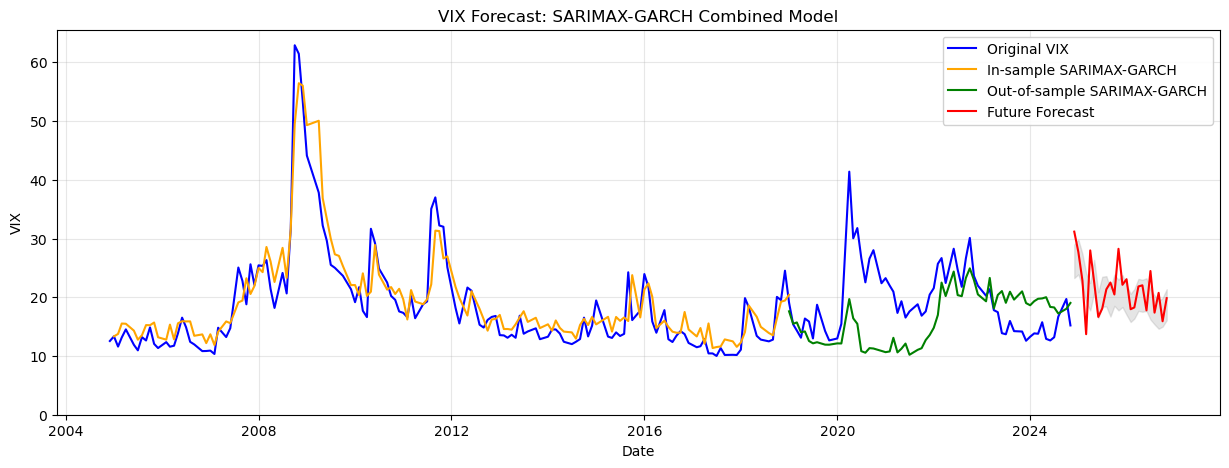

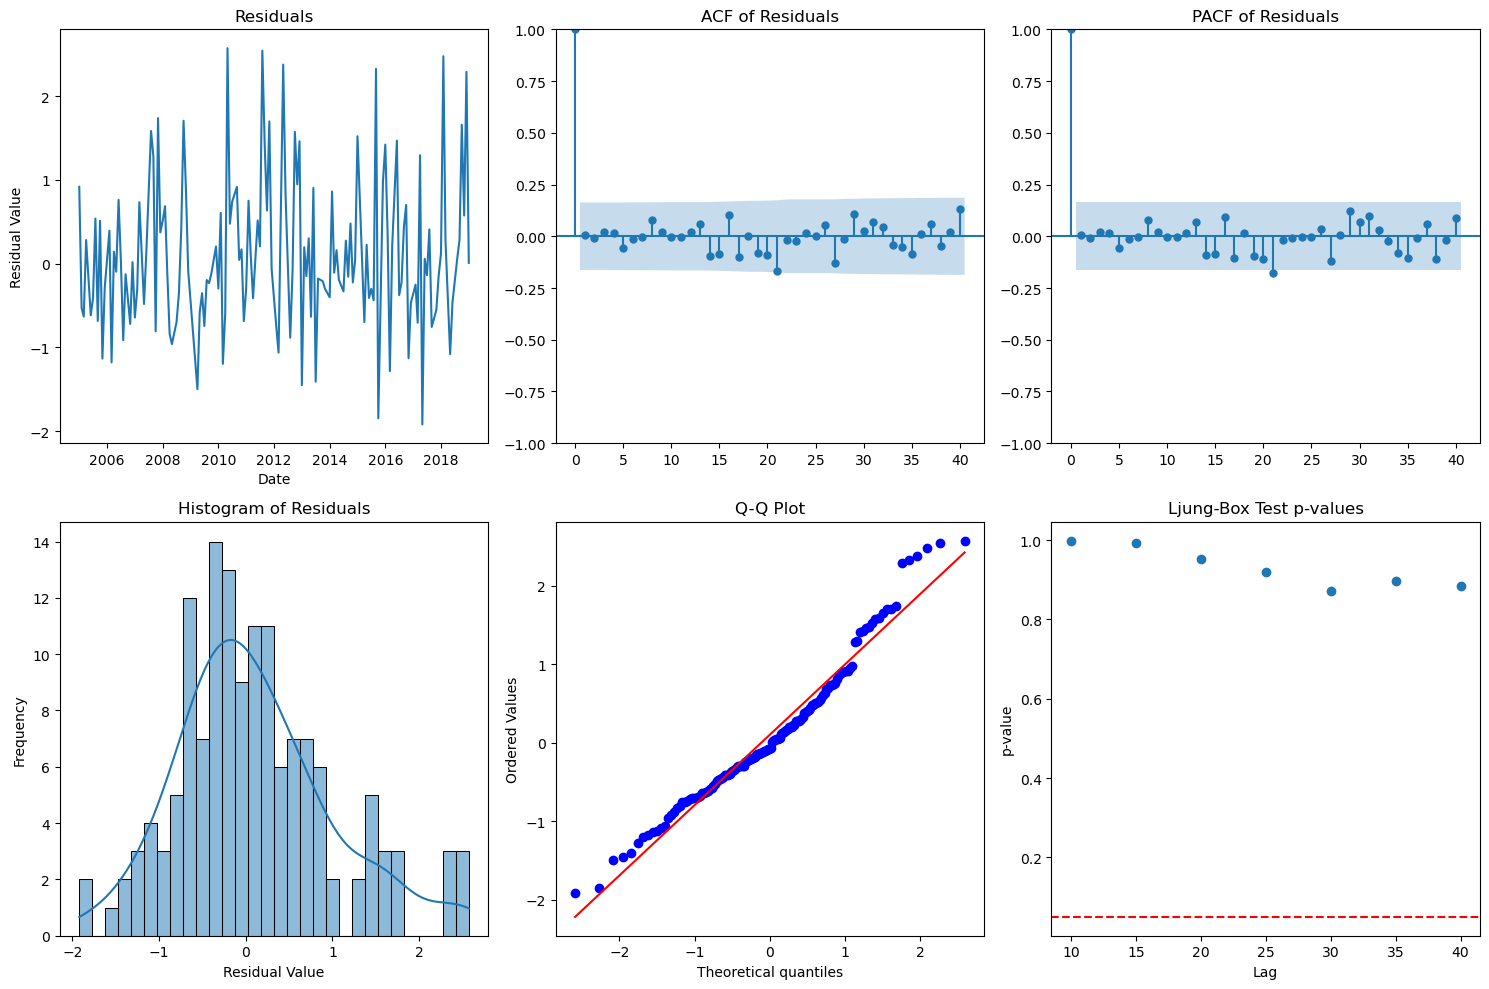


Jarque-Bera Test for Normality:
Statistic: 10.4134, p-value: 0.0055

Ljung-Box Test for Autocorrelation:
      lb_stat  lb_pvalue
10   1.587177   0.998637
15   4.857914   0.993263
20  10.786157   0.951581
25  15.829907   0.919800
30  21.515330   0.871085

Ljung-Box Test for ARCH effects:
      lb_stat  lb_pvalue
10   5.586497   0.848726
15   9.845229   0.829361
20  16.647956   0.675701
25  21.111369   0.686383
30  22.382068   0.839787

SARIMAX-GARCH R-squared: 0.6151
SARIMAX-GARCH RMSE: 5.0003
SARIMAX-GARCH MAPE: 0.1851
SARIMAX-GARCH Directional Accuracy: 0.6373


In [80]:
# GARCH model
garch_model = arch_model(sarimax_residuals, vol='EGARCH', p=1, o=1, q=1, dist='studentsT')
garch_results = garch_model.fit(disp='off', update_freq=5, options={'maxiter':1000})

# Generate volatility forecasts
in_sample_volatility = garch_results.conditional_volatility
total_forecast_length = len(out_of_sample) + 24  # 24 months ahead
garch_forecast = garch_results.forecast(horizon=total_forecast_length, method='simulation', reindex=False)
forecast_volatility = np.sqrt(garch_forecast.variance.values[-1, :])

df = garch_results.params['nu']
rng = np.random.default_rng(42)

# Combine SARIMAX and GARCH
# In-sample combinations
in_sample_combined = (sarimax_in_sample_predictions[1:] + 
                      in_sample_volatility * rng.standard_t(df, size=len(sarimax_in_sample_predictions[1:])))

# Out-of-sample combinations
out_sample_combined = (sarimax_out_of_sample_predictions + 
                       forecast_volatility[:len(out_of_sample)] * rng.standard_t(df, size=len(out_of_sample)))

# Future forecast combinations
forecast_horizon = 24
future_forecast = sarimax_results.get_forecast(steps=forecast_horizon, exog=exog_out_of_sample.tail(24))
future_forecast_mean = future_forecast.predicted_mean
future_forecast_combined = np.exp(future_forecast_mean + 
                            forecast_volatility[len(out_of_sample):] * rng.standard_t(df, size=forecast_horizon))

# Ensure non-negative values
in_sample_combined = np.maximum(in_sample_combined, 0)
out_sample_combined = np.maximum(out_sample_combined, 0)
future_forecast_combined = np.maximum(future_forecast_combined, 0)

# Plot Results
plt.figure(figsize=(15, 5))
plt.plot(VIX.index, VIX, label='Original VIX', color='blue')
plt.plot(sarimax_in_sample_predictions.index[1:], in_sample_combined, 
         label='In-sample SARIMAX-GARCH', color='orange')
plt.plot(sarimax_out_of_sample_predictions.index, out_sample_combined, 
         label='Out-of-sample SARIMAX-GARCH', color='green')
plt.plot(forecast_dates, future_forecast_combined, 
         label='Future Forecast', color='red')

# Calculate 68% confidence intervals (approximately one standard deviation)
t_multiplier = stats.t.ppf(0.84, df)  # 68% CI using t-distribution
lower_bound = np.exp(future_forecast_mean - t_multiplier * forecast_volatility[len(out_of_sample):])
upper_bound = np.exp(future_forecast_mean + t_multiplier * forecast_volatility[len(out_of_sample):])

# Plot with 68% confidence intervals
plt.fill_between(forecast_dates, lower_bound, upper_bound,
                 color='gray', alpha=0.2)

plt.title('VIX Forecast: SARIMAX-GARCH Combined Model')
plt.xlabel('Date')
plt.ylabel('VIX')
plt.grid(True, alpha=0.3)
plt.ylim(bottom=0)  # VIX cannot be negative
plt.legend(loc='best', framealpha=0.9)
plt.show()

# Calculate standardized residuals
standardized_residuals = garch_results.resid / garch_results.conditional_volatility

# Create subplots for residual analysis
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot 1: Residuals Time Series
axes[0, 0].plot(standardized_residuals)
axes[0, 0].set_title('Residuals')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Residual Value')

# Plot 2: ACF
plot_acf(standardized_residuals, ax=axes[0, 1], lags=40)
axes[0, 1].set_title('ACF of Residuals')

# Plot 3: PACF
plot_pacf(standardized_residuals, ax=axes[0, 2], lags=40)
axes[0, 2].set_title('PACF of Residuals')

# Plot 4: Histogram
sns.histplot(standardized_residuals, kde=True, ax=axes[1, 0], bins=30)
axes[1, 0].set_title('Histogram of Residuals')
axes[1, 0].set_xlabel('Residual Value')
axes[1, 0].set_ylabel('Frequency')

# Plot 5: Q-Q Plot
stats.probplot(standardized_residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot')

# Plot 6: Ljung-Box Test
lb_results = acorr_ljungbox(standardized_residuals, lags=[10, 15, 20, 25, 30, 35, 40])
axes[1, 2].scatter(lb_results.index, lb_results['lb_pvalue'])
axes[1, 2].axhline(y=0.05, color='r', linestyle='--')
axes[1, 2].set_title('Ljung-Box Test p-values')
axes[1, 2].set_xlabel('Lag')
axes[1, 2].set_ylabel('p-value')

plt.tight_layout()
plt.show()

# Additional Statistical Tests
print("\nJarque-Bera Test for Normality:")
jb_test = stats.jarque_bera(standardized_residuals)
print(f"Statistic: {jb_test.statistic:.4f}, p-value: {jb_test.pvalue:.4f}")

print("\nLjung-Box Test for Autocorrelation:")
lb_test = acorr_ljungbox(standardized_residuals, lags=[10, 15, 20, 25, 30])
print(lb_test)

print("\nLjung-Box Test for ARCH effects:")
lb_test_squared = acorr_ljungbox(standardized_residuals**2, lags=[10, 15, 20, 25, 30])
print(lb_test_squared)

# Performance metrics
sarimax_garch_combined_predictions = pd.concat([in_sample_combined, out_sample_combined])
sarimax_garch_combined_predictions = sarimax_garch_combined_predictions[~sarimax_garch_combined_predictions.index.duplicated(keep='first')]

sarimax_garch_r2 = r2_score(VIX[1:], sarimax_garch_combined_predictions)
sarimax_garch_rmse = root_mean_squared_error(VIX[1:], sarimax_garch_combined_predictions)
sarimax_garch_mape = mean_absolute_percentage_error(VIX[1:], sarimax_garch_combined_predictions)
sarimax_garch_da = mean_directional_accuracy(VIX[1:], sarimax_garch_combined_predictions)


print(f"\nSARIMAX-GARCH R-squared: {sarimax_garch_r2:.4f}")
print(f"SARIMAX-GARCH RMSE: {sarimax_garch_rmse:.4f}")
print(f"SARIMAX-GARCH MAPE: {sarimax_garch_mape:.4f}")
print(f"SARIMAX-GARCH Directional Accuracy: {sarimax_garch_da:.4f}")


               R-squared      RMSE      MAPE  Directional Accuracy
SARIMA          0.530447  5.517500  0.192874              0.478049
SARIMAX         0.613911  5.008295  0.185765              0.632353
SARIMAX-GARCH   0.615149  5.000260  0.185141              0.637255


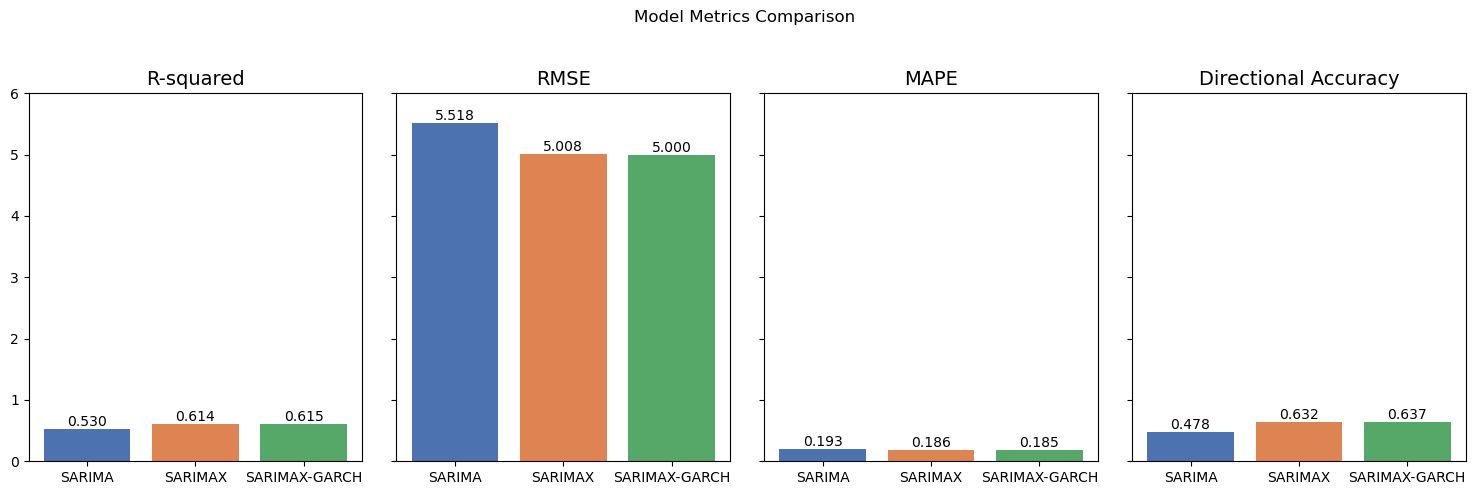

In [81]:
sarima_metrics = [sarima_r2, sarima_rmse, sarima_mape, sarima_da]
sarimax_metrics = [sarimax_r2, sarimax_rmse, sarimax_mape, sarimax_da]
sarimax_garch_metrics = [sarimax_garch_r2, sarimax_garch_rmse, sarimax_garch_mape, sarimax_garch_da]

# Create a DataFrame to display the results
models = ['SARIMA', 'SARIMAX', 'SARIMAX-GARCH']
metrics = ['R-squared', 'RMSE', 'MAPE', 'Directional Accuracy']

results = pd.DataFrame([sarima_metrics, sarimax_metrics, sarimax_garch_metrics], 
                       columns=metrics, index=models)

print(f'\n{results}')

colors = ['#4c72b0', '#dd8452', '#55a868']  # Blue, Orange, Green

# Plotting subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)  # Create 4 subplots in one row

for i, metric in enumerate(results.columns):
    ax = axes[i]
    bars = ax.bar(results.index, results[metric], color=colors)
    ax.set_title(metric, fontsize=14)  # Set subplot title
    ax.set_ylim(0, 6)  # Adjust y-axis limit for better visualization
    ax.tick_params(axis='x', labelrotation=0)  # Rotate x-axis labels for better readability
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=10)  # Add actual value on top of each bar

# Add overall title and improve layout
fig.suptitle('Model Metrics Comparison')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit everything nicely
plt.show()


In [52]:
future_forecast_combined.describe()

count    24.000000
mean     20.114894
std       3.629534
min      11.522430
25%      18.154192
50%      19.703131
75%      22.884448
max      25.750876
Name: predicted_mean, dtype: float64